In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/for_git")

Mounted at /content/drive


In [ ]:
transcriptome_01 = pd.read_excel('Table S-3.xlsx', sheet_name='TPM > 0.1')
transcriptome_1 = pd.read_excel('Table S-3.xlsx', sheet_name='TPM > 1')
transcriptome_10 = pd.read_excel('Table S-3.xlsx', sheet_name='TPM > 10')

pharmacogenes_01 = pd.read_excel('Table S-4.xlsx', sheet_name='TPM > 0.1')
pharmacogenes_1 = pd.read_excel('Table S-4.xlsx', sheet_name='TPM > 1')
pharmacogenes_10 = pd.read_excel('Table S-4.xlsx', sheet_name='TPM > 10')

In [ ]:
transcriptome_01

,ENSG,Liver_donor_5(TPM > 0.1),Liver_donor_3(TPM > 0.1),Liver_donor_1(TPM > 0.1),Huh7_3(TPM > 0.1),Huh7_2(TPM > 0.1),Huh7_1(TPM > 0.1),HepG2_5(TPM > 0.1),HepG2_4(TPM > 0.1),HepG2_3(TPM > 0.1),HepG2_2(TPM > 0.1),HepG2_1(TPM > 0.1)
0,ENSG00000186092.7,0,0,0,0,0,0,0,0,0,0,0
1,ENSG00000284733.2,0,0,0,0,0,0,0,0,0,0,0
2,ENSG00000284662.2,0,0,0,0,0,0,0,0,0,0,0
3,ENSG00000187634.13,1,0,0,1,2,2,0,1,0,0,0
4,ENSG00000188976.11,0,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19695,ENSG00000212907.2,1,1,1,1,1,1,1,1,1,1,1
19696,ENSG00000198886.2,1,1,1,1,1,1,1,1,1,1,1
19697,ENSG00000198786.2,1,1,1,1,1,1,1,1,1,1,1
19698,ENSG00000198695.2,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
def select_clmn_tissue(df, tissue):
  """ The function of selecting columns by type of tissue"""
  list_cut = ['ENSG']
  for i in list(df.columns):
    if f'{tissue}' in i:
      list_cut.append(i)

  return df[list_cut].set_index('ENSG')

def calculate_pca(df):
  """ Function to calculate PCA for all samples, returns 3 dataframes """
  pca = PCA(n_components= 2)
  pca.fit(df.T)
  print(f'Explained variance - {pca.explained_variance_ratio_[0].round(3)*100}% и {pca.explained_variance_ratio_[1].round(3)*100}%')
  columns = ['pc_%i' % i for i in range(1, 3)]
  Hep = select_clmn_tissue(df.reset_index(), 'Hep')
  Huh = select_clmn_tissue(df.reset_index(), 'Huh')
  Liv = select_clmn_tissue(df.reset_index(), 'Liv')

  return pd.DataFrame(pca.transform(Hep.T), columns=columns, index=Hep.T.index).reset_index(), pd.DataFrame(pca.transform(Huh.T), columns=columns, index=Huh.T.index).reset_index(), pd.DataFrame(pca.transform(Liv.T), columns=columns, index=Liv.T.index).reset_index()


def print_pca(df, cut):

  for_plt = calculate_pca(df)

  fig = plt.figure(figsize = (4,4))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('PС1', fontsize = 15)
  ax.set_ylabel('PС2', fontsize = 15)
  ax.grid(which='major',  linewidth=1)
  ax.scatter(for_plt[0].loc[:, 'pc_1'], for_plt[0].loc[:, 'pc_2'], c = '#FF8C00', s = 250, alpha = 0.6, edgecolors='black')
  ax.scatter(for_plt[1].loc[:, 'pc_1'], for_plt[1].loc[:, 'pc_2'], c = '#0A3DA4', s = 250, alpha = 0.6, edgecolors='black')
  ax.scatter(for_plt[2].loc[:, 'pc_1'], for_plt[2].loc[:, 'pc_2'], c = '#008000', s = 250, alpha = 0.6, edgecolors='black')


  ax.set_title(f'PCA by number of splice-forms per gene, TPM > {cut}', fontsize = 20)

  ax.legend(['HepG2', 'Huh7', 'Liver'], fontsize=14)

Explained variance - 35.6% и 17.9%


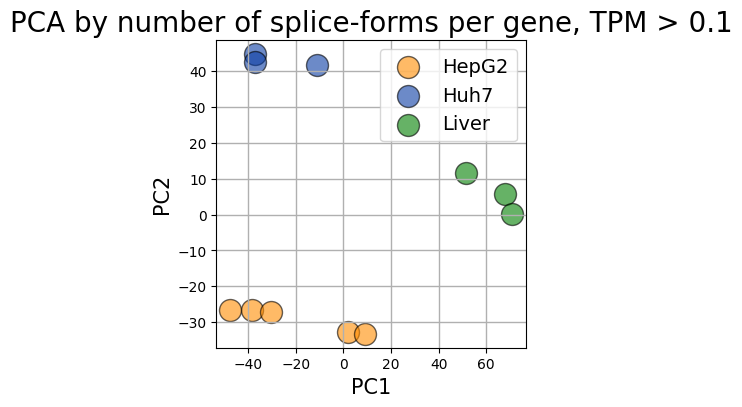

In [ ]:
print_pca(transcriptome_01.set_index('ENSG'), 0.1)